## Import libraries

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import splitfolders as spfd
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D,Input,Dense,Conv2D,Add,SeparableConv2D,ReLU,BatchNormalization,MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from prettytable import PrettyTable

from tqdm import tqdm

## Google Colab
Jalankan cell ini jika menggunakan google colab

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google.colab'

## Dataset

In [2]:
#dataset = 'D:/Latihan/Dataset'
dataset = "D:/Latihan/Dataset - Copy"

## Exploratory Data Analysis & Data preparation

Menunjukkan Jumlah Image tiap Kelas

In [3]:
list = []
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(dataset):
    list.append(len(files))
    #print('Searching in : {} with total {} image'.format(base,len(files)))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

In [4]:
d = {'Class': os.listdir(dataset), 'Total_image_in_class': np.delete(list, [0])}
data1 = pd.DataFrame(data=d)
data1

,Class,Total_image_in_class
0,Acne,250
1,Eksim,250
2,Normal,250
3,Rosacea,248


Menunjukkan persebaran data tiap kelas melalui bar plot

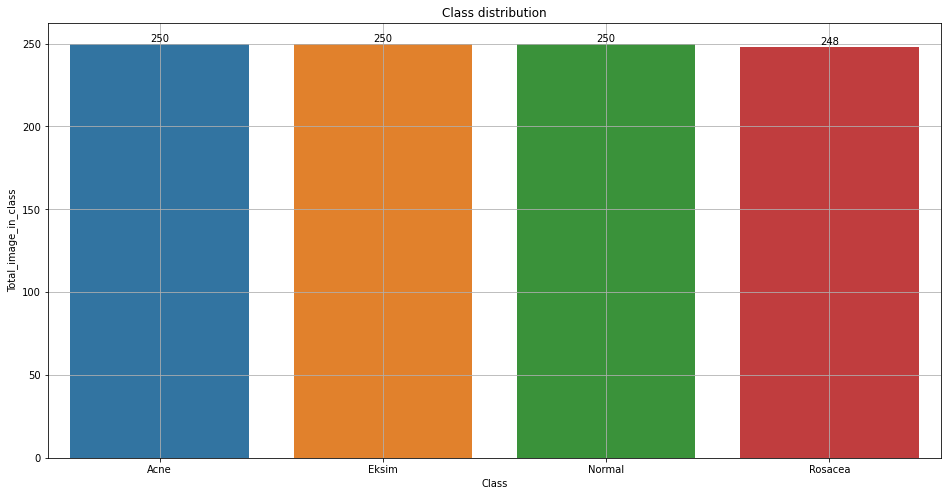

In [5]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=data1,x='Class', y='Total_image_in_class')
plt.title('Class distribution')
ax.bar_label(ax.containers[0])
ax.grid()
plt.show()

In [6]:
print("Jumlah kelas dalam dataset adalah {}".format(len(data1)))
print("Jumlah total gambar dalam dataset adalah {}".format(sum(data1['Total_image_in_class'])))

Jumlah kelas dalam dataset adalah 4
Jumlah total gambar dalam dataset adalah 998


Melakukan EDA lebih dalam lagi

In [7]:
filenames = []
folder = []
image = []
shape = []
x = []
y = []

for path, subdirs, files in tqdm(os.walk(dataset)):
    for name in files:
        filenames += [os.path.join(path, name)]
        folder += [os.path.basename(os.path.dirname(filenames[-1]))]
        image += [os.path.basename(filenames[-1])]
        
for i in range (len(filenames)) :
    shape += [cv2.imread(filenames[i]).shape[0:2]]

for i in range (len(filenames)) :
    x += [shape[i][0]]
    y += [shape[i][1]]

new_ip = []
for i in range(len(filenames)) :
    new = filenames[i].replace("\\", "/")
    new_ip.append(new)
    
data2 = pd.DataFrame({'Image path':new_ip, 'Class':folder, 'Name_Image':image})

5it [00:00, 378.02it/s]


In [8]:
extension = []
for i in range (sum(data1['Total_image_in_class'])) :
    strValue = data2['Name_Image'][i]
    ch = '.'
    newCh = strValue[strValue.find(ch):]
    extension.append(newCh)

In [9]:
data2['Class_num'] = pd.factorize(data2['Class'])[0]
data2['Extension'] = extension
data2['Shape(x,y)'] = shape
data2['x'] = x
data2['y'] = y
data2

,Image path,Class,Name_Image,Class_num,Extension,"Shape(x,y)",x,y
0,D:/Latihan/Dataset - Copy/Acne/008907VB.jpg,Acne,008907VB.jpg,0,.jpg,"(362, 260)",362,260
1,D:/Latihan/Dataset - Copy/Acne/008911VB.jpg,Acne,008911VB.jpg,0,.jpg,"(362, 260)",362,260
2,D:/Latihan/Dataset - Copy/Acne/008938HB.jpg,Acne,008938HB.jpg,0,.jpg,"(1082, 1606)",1082,1606
3,D:/Latihan/Dataset - Copy/Acne/032200VB.jpg,Acne,032200VB.jpg,0,.jpg,"(380, 260)",380,260
4,D:/Latihan/Dataset - Copy/Acne/032206VB.jpg,Acne,032206VB.jpg,0,.jpg,"(377, 260)",377,260
...,...,...,...,...,...,...,...,...
993,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-5.jpg,3,.jpg,"(480, 720)",480,720
994,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-6.jpg,3,.jpg,"(480, 720)",480,720
995,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-7.jpg,3,.jpg,"(480, 720)",480,720
996,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-8.jpg,3,.jpg,"(480, 720)",480,720


Dataframe diatas akan kita lakukan sort terhadap kolom x dan y

In [10]:
data2.sort_values(by=['x','y'])

,Image path,Class,Name_Image,Class_num,Extension,"Shape(x,y)",x,y
696,D:/Latihan/Dataset - Copy/Normal/0197.jpg,Normal,0197.jpg,2,.jpg,"(129, 114)",129,114
593,D:/Latihan/Dataset - Copy/Normal/0094.jpg,Normal,0094.jpg,2,.jpg,"(136, 116)",136,116
660,D:/Latihan/Dataset - Copy/Normal/0161.jpg,Normal,0161.jpg,2,.jpg,"(143, 185)",143,185
573,D:/Latihan/Dataset - Copy/Normal/0074.jpg,Normal,0074.jpg,2,.jpg,"(144, 131)",144,131
735,D:/Latihan/Dataset - Copy/Normal/0236.jpg,Normal,0236.jpg,2,.jpg,"(146, 139)",146,139
...,...,...,...,...,...,...,...,...
809,D:/Latihan/Dataset - Copy/Rosacea/r51.jpg,Rosacea,r51.jpg,3,.jpg,"(2379, 2751)",2379,2751
389,D:/Latihan/Dataset - Copy/Eksim/d56.jpg,Eksim,d56.jpg,1,.jpg,"(2448, 3024)",2448,3024
697,D:/Latihan/Dataset - Copy/Normal/0198.jpg,Normal,0198.jpg,2,.jpg,"(2600, 2570)",2600,2570
378,D:/Latihan/Dataset - Copy/Eksim/d44.jpg,Eksim,d44.jpg,1,.jpg,"(3088, 2320)",3088,2320


In [11]:
print("Ukuran gambar dalam dataset memiliki nilai minimum untuk (x,y) yaitu x={} dan y{}".format(min(x),min(y)))

Ukuran gambar dalam dataset memiliki nilai minimum untuk (x,y) yaitu x=129 dan y112


Kita buang gambar dalam dataset yang ukurannya kurang dari (180,180)

In [12]:
df_filtered = data2[(data2['x'] >= 180) & (data2['y'] >= 180)]
df_filtered

,Image path,Class,Name_Image,Class_num,Extension,"Shape(x,y)",x,y
0,D:/Latihan/Dataset - Copy/Acne/008907VB.jpg,Acne,008907VB.jpg,0,.jpg,"(362, 260)",362,260
1,D:/Latihan/Dataset - Copy/Acne/008911VB.jpg,Acne,008911VB.jpg,0,.jpg,"(362, 260)",362,260
2,D:/Latihan/Dataset - Copy/Acne/008938HB.jpg,Acne,008938HB.jpg,0,.jpg,"(1082, 1606)",1082,1606
3,D:/Latihan/Dataset - Copy/Acne/032200VB.jpg,Acne,032200VB.jpg,0,.jpg,"(380, 260)",380,260
4,D:/Latihan/Dataset - Copy/Acne/032206VB.jpg,Acne,032206VB.jpg,0,.jpg,"(377, 260)",377,260
...,...,...,...,...,...,...,...,...
993,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-5.jpg,3,.jpg,"(480, 720)",480,720
994,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-6.jpg,3,.jpg,"(480, 720)",480,720
995,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-7.jpg,3,.jpg,"(480, 720)",480,720
996,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-8.jpg,3,.jpg,"(480, 720)",480,720


Melihat kembali persebaran dataset kita

In [13]:
data3 = df_filtered.groupby('Class').count().rename({'Class_num': 'Total_image_in_class'}, axis='columns')
data3['Total_image_in_class']

Class
Acne       250
Eksim      250
Normal     165
Rosacea    248
Name: Total_image_in_class, dtype: int64

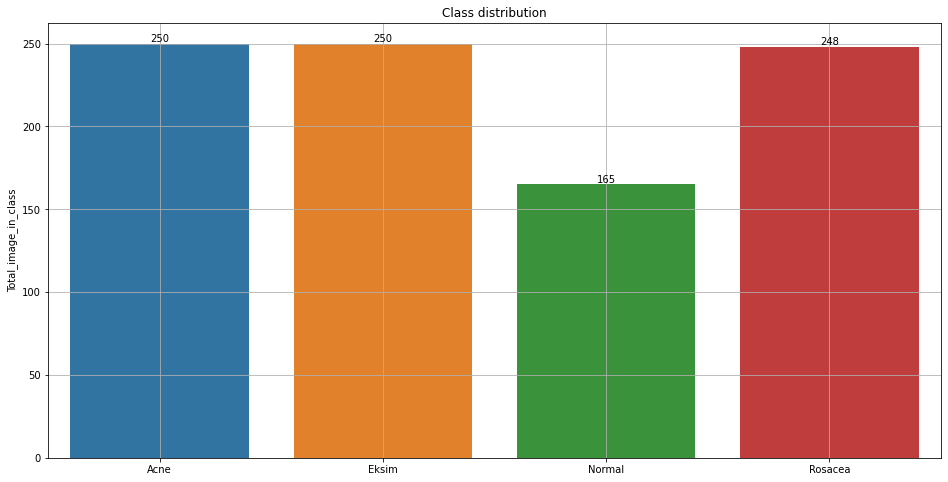

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=data3,x=data3.index.get_level_values(0).tolist(), y='Total_image_in_class')
plt.title('Class distribution')
ax.bar_label(ax.containers[0])
ax.grid()
plt.show()

In [15]:
print("Jumlah kelas dalam dataset adalah {}".format(len(data3)))
print("Jumlah total gambar dalam dataset adalah {}".format(sum(data3['Total_image_in_class'])))

Jumlah kelas dalam dataset adalah 4
Jumlah total gambar dalam dataset adalah 913


Persebaran data dari tiap kelas kurang merata

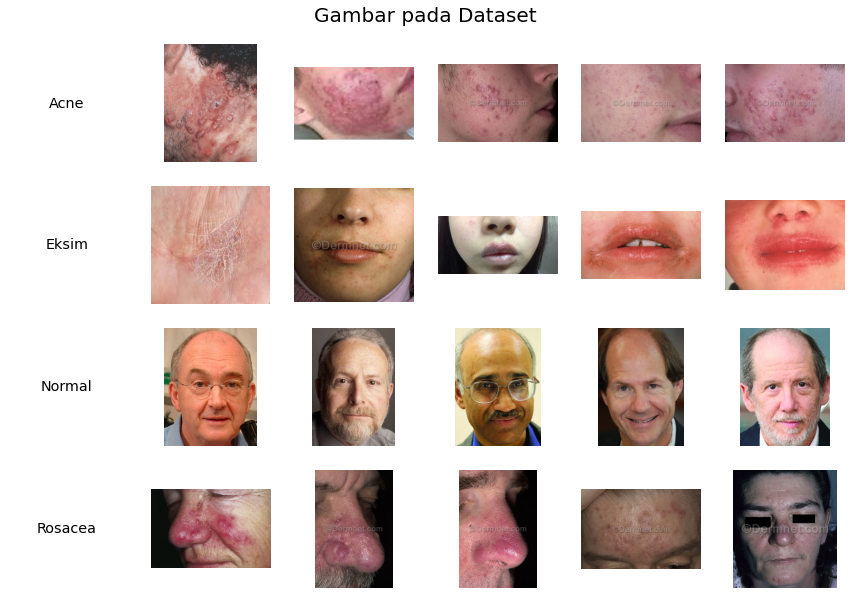

In [16]:
unique_list = []
unique = df_filtered.groupby('Class').apply(lambda df: df.sample(5))['Class'].unique()
fig = plt.figure(figsize=(15, 10))
plt.title('Gambar pada Dataset', fontsize=20, y=1.03)
plt.axis('off')
columns = 6
rows = 4
img2show = df_filtered.groupby('Class').apply(lambda df: df.sample(6))
for i in range(1, columns*rows +1):
    if i % columns == 1 :
        unique_list.append(i)
        fig.add_subplot(rows, columns, i)
        plt.text(0.5,0.5, unique[len(unique_list)-1], ha='center', va='center', fontsize='x-large', fontweight='normal')
        plt.axis('off')
    else :
        fig.add_subplot(rows, columns, i)
        img = mpimg.imread(img2show.iloc[i-1]['Image path'])
        #kelas = img2show.iloc[i-1]['Class']
        imgplot = plt.imshow(img)
        plt.axis('off')
        #plt.title(f'{kelas}')
plt.show()

## Data Splitting

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_filtered,
                                                    df_filtered['Class'], 
                                                    test_size=0.1, random_state=2022, stratify = df_filtered['Class'])

## Modelling

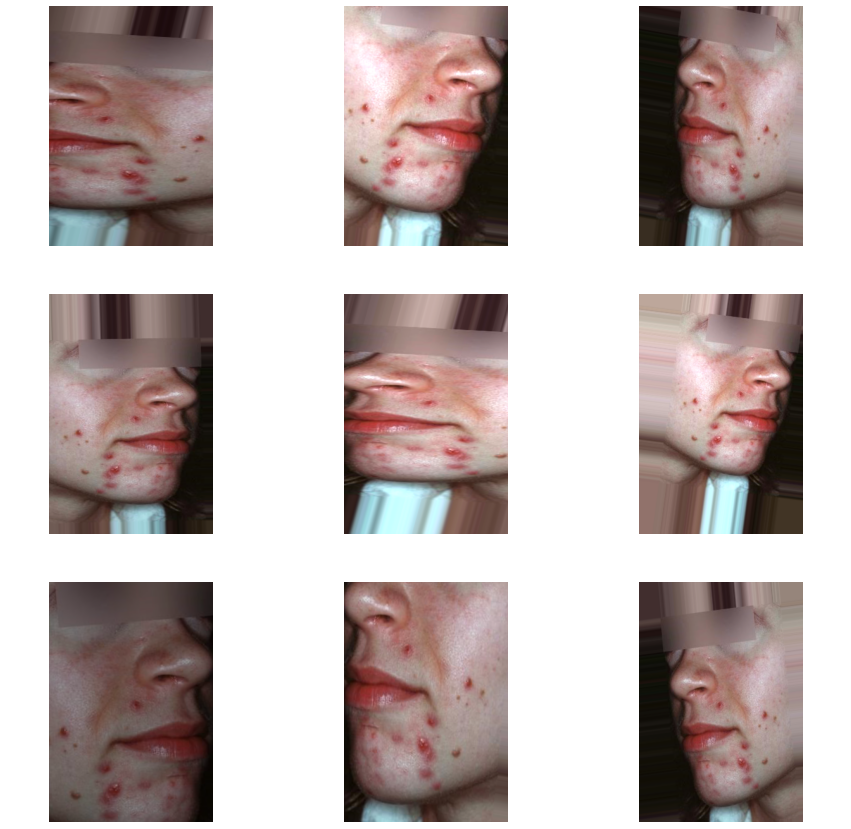

In [18]:
# Example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# load the image
img = load_img("D:/Latihan/Dataset - Copy/Acne/032245VB.jpg")
# Convert to numpy array
data = img_to_array(img)
# Expand dimension to one sample
samples = expand_dims(data, 0)
# Create image data augmentation generator
datagen = ImageDataGenerator(            rotation_range=10,
                                         zoom_range=0.4,
                                         horizontal_flip=True,
                                         brightness_range=[0.5,1.4],
                                         width_shift_range=0.1, 
                                         height_shift_range=0.1,
                                         fill_mode='nearest'
                             )
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot


fig = plt.figure(figsize=(15, 15))
plt.axis('off')
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    batch = it.next()

    image = batch[0].astype('uint8')

    fig.add_subplot(rows, columns, i)
    imgplot = plt.imshow(image)
    
    plt.axis('off')
plt.show()

In [19]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   rescale=1/255,
                                   brightness_range=[0.5,1.5],
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   fill_mode='nearest') 
    
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [20]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.nasnet import NASNetMobile, NASNetLarge
from tensorflow.keras.applications.efficientnet import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7

list_model = [EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, 
              EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
              InceptionV3, MobileNet, MobileNetV2, NASNetMobile, NASNetLarge, 
              ResNet50, ResNet50V2, VGG16, VGG19
             ]

def load_pretrained_model(model_name, input_shape, include_top, weights, pooling) :
    pretrained_model = model_name(include_top = include_top,
                                  input_shape = input_shape, 
                                  weights =  weights,
                                  pooling = pooling
                                 )
    print("Using {} pretrained_model with input_shape = {}".format(model_name, input_shape))
    return pretrained_model

In [21]:
##################################################
# Define input to load_pretrained_model function #
##################################################

n = 8 #Masukkan angka dari 0-16
model_name = list_model[n] #Tidak perlu diubah-ubah
input_shape = (180,180, 3)
include_top = False
weights = 'imagenet'
pooling = 'avg'

##################################################

pretrained_model= load_pretrained_model(model_name, input_shape, include_top, weights, pooling)
pretrained_model.trainable = True

print("Number of layers in the base model: ", len(pretrained_model.layers))

Using <function InceptionV3 at 0x0000021AF3B0D0D0> pretrained_model with input_shape = (180, 180, 3)
Number of layers in the base model:  312


In [22]:
for layer in pretrained_model.layers[:40]:
        layer.trainable=False

In [23]:
pretrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 89, 89, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 89, 89, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [24]:
def getModel():
    model = Sequential()
    model.add(pretrained_model),

    model.add(Flatten()),
    model.add(BatchNormalization()),
    model.add(Dropout(0.1)),
    model.add(Dense(64, activation='relu')),
    model.add(Dense(4, activation='softmax'))
    
    return model

In [25]:
getModel().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                        

In [26]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def scheduler(epoch, lr):
    if epoch <= 60:
        return lr 
    else:
        return lr * tf.math.exp(-0.1)

In [27]:
def plot_result(history, epoch, title):
    plt.style.use('ggplot')

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    f1 = history.history['f1']
    val_f1 = history.history['val_f1']

    learning_rate = history.history['lr']

    epochs_range = range(epoch)

    fig = plt.figure(figsize=(18, 8))
    st = fig.suptitle(title, fontsize=20, y=0.6)
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.subplot(2, 2, 3)
    plt.plot(epochs_range, f1, label='Training F1')
    plt.plot(epochs_range, val_f1, label='Validation F1')
    plt.legend(loc='lower right')
    plt.title('Training and Validation F1')

    plt.subplot(2, 2, 4)
    plt.plot(epochs_range, learning_rate)
    plt.title('Learning Rate')

    st.set_y(0.95)
    plt.show()

In [28]:
from sklearn.model_selection import StratifiedKFold
# ===============Stratified K-Fold======================
num_fold = 5
skf = StratifiedKFold(n_splits=num_fold, shuffle=True, random_state=2022)
skf.get_n_splits(X_train, y_train)

5

In [29]:
# Membuat list untuk menampung semua metrics
accuracy = []
val_accuracy = []

loss = []
val_loss = []

f_1 = []
val_f1 = []

Fold 1/5

Found 656 validated image filenames belonging to 4 classes.
Found 165 validated image filenames belonging to 4 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
21/21 [==============================] - 26s 656ms/step - loss: 1.5229 - accuracy: 0.5152 - f1: 0.4653 - val_loss: 277.5782 - val_accuracy: 0.2485 - val_f1: 0.2455 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
21/21 [==============================] - 9s 418ms/step - loss: 0.7826 - accuracy: 0.6814 - f1: 0.6268 - val_loss: 107.3656 - val_accuracy: 0.1879 - val_f1: 0.1835 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
21/21 [==============================] - 9s 423ms/step - loss: 0.6267 - accuracy: 0.7713 - f1: 0.7631 - val_loss: 3404.9404 - val_accuracy: 0.2061 - val_f1: 0.1932 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning

21/21 [==============================] - 11s 502ms/step - loss: 0.1735 - accuracy: 0.9268 - f1: 0.9296 - val_loss: 9.6614 - val_accuracy: 0.6667 - val_f1: 0.6603 - lr: 0.0010

Epoch 00031: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 31/100
21/21 [==============================] - 11s 510ms/step - loss: 0.2591 - accuracy: 0.9192 - f1: 0.9209 - val_loss: 4.9415 - val_accuracy: 0.8485 - val_f1: 0.8447 - lr: 0.0010

Epoch 00032: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 32/100
21/21 [==============================] - 11s 495ms/step - loss: 0.2140 - accuracy: 0.9223 - f1: 0.9169 - val_loss: 77.9841 - val_accuracy: 0.6606 - val_f1: 0.6657 - lr: 0.0010

Epoch 00033: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 33/100
21/21 [==============================] - 11s 492ms/step - loss: 0.2350 - accuracy: 0.9329 - f1: 0.9310 - val_loss: 14.1349 - val_accuracy: 0.5818 - val_f1: 0.5861 - lr: 0.0010

Epoch 

21/21 [==============================] - 10s 459ms/step - loss: 0.0733 - accuracy: 0.9756 - f1: 0.9761 - val_loss: 0.7595 - val_accuracy: 0.8182 - val_f1: 0.7913 - lr: 0.0010

Epoch 00061: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 61/100
21/21 [==============================] - 10s 457ms/step - loss: 0.0538 - accuracy: 0.9832 - f1: 0.9828 - val_loss: 0.5383 - val_accuracy: 0.8606 - val_f1: 0.8671 - lr: 0.0010

Epoch 00062: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
Epoch 62/100
21/21 [==============================] - 10s 459ms/step - loss: 0.1029 - accuracy: 0.9695 - f1: 0.9709 - val_loss: 0.6881 - val_accuracy: 0.8545 - val_f1: 0.8511 - lr: 9.0484e-04

Epoch 00063: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
Epoch 63/100
21/21 [==============================] - 10s 450ms/step - loss: 0.0562 - accuracy: 0.9832 - f1: 0.9843 - val_loss: 0.4566 - va

21/21 [==============================] - 10s 464ms/step - loss: 0.0483 - accuracy: 0.9863 - f1: 0.9866 - val_loss: 0.4849 - val_accuracy: 0.8970 - val_f1: 0.9058 - lr: 7.4273e-05

Epoch 00088: LearningRateScheduler setting learning rate to tf.Tensor(6.720541e-05, shape=(), dtype=float32).
Epoch 88/100
21/21 [==============================] - 10s 469ms/step - loss: 0.0136 - accuracy: 0.9970 - f1: 0.9970 - val_loss: 0.4516 - val_accuracy: 0.9030 - val_f1: 0.9060 - lr: 6.7205e-05

Epoch 00089: LearningRateScheduler setting learning rate to tf.Tensor(6.0809965e-05, shape=(), dtype=float32).
Epoch 89/100
21/21 [==============================] - 10s 462ms/step - loss: 0.0111 - accuracy: 0.9970 - f1: 0.9970 - val_loss: 0.4438 - val_accuracy: 0.9030 - val_f1: 0.8933 - lr: 6.0810e-05

Epoch 00090: LearningRateScheduler setting learning rate to tf.Tensor(5.502313e-05, shape=(), dtype=float32).
Epoch 90/100
21/21 [==============================] - 10s 466ms/step - loss: 0.0098 - accuracy: 0.9970 

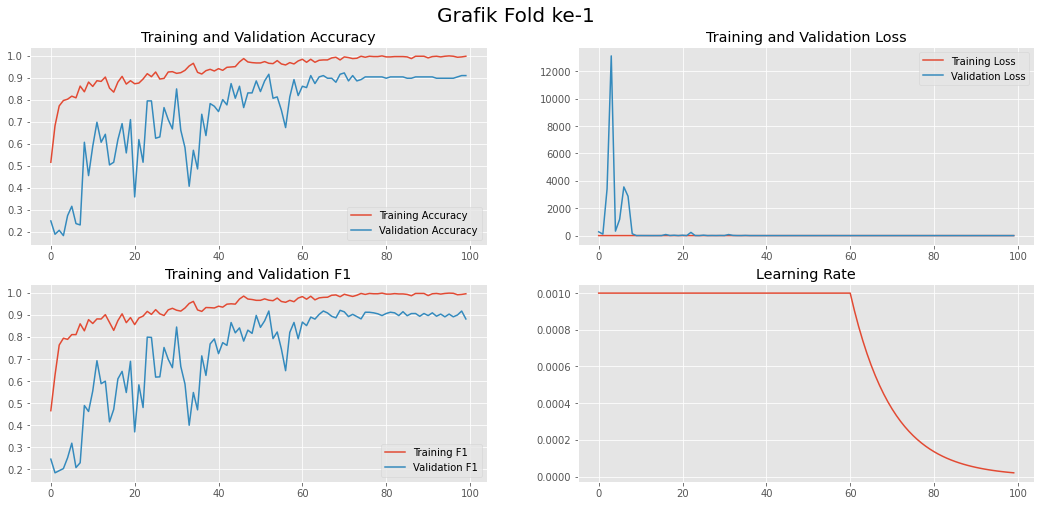


Fold 2/5

Found 657 validated image filenames belonging to 4 classes.
Found 164 validated image filenames belonging to 4 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
21/21 [==============================] - 23s 846ms/step - loss: 0.3962 - accuracy: 0.8782 - f1: 0.8567 - val_loss: 1.0961 - val_accuracy: 0.7317 - val_f1: 0.0642 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
21/21 [==============================] - 10s 458ms/step - loss: 0.2505 - accuracy: 0.9117 - f1: 0.9099 - val_loss: 0.9747 - val_accuracy: 0.8537 - val_f1: 0.1119 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
21/21 [==============================] - 10s 460ms/step - loss: 0.1500 - accuracy: 0.9422 - f1: 0.9455 - val_loss: 0.8767 - val_accuracy: 0.8110 - val_f1: 0.4281 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning rat

21/21 [==============================] - 10s 465ms/step - loss: 0.1393 - accuracy: 0.9559 - f1: 0.9582 - val_loss: 37.4860 - val_accuracy: 0.7744 - val_f1: 0.7727 - lr: 0.0010

Epoch 00031: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 31/100
21/21 [==============================] - 10s 457ms/step - loss: 0.1494 - accuracy: 0.9498 - f1: 0.9487 - val_loss: 3.5141 - val_accuracy: 0.7500 - val_f1: 0.7257 - lr: 0.0010

Epoch 00032: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 32/100
21/21 [==============================] - 10s 456ms/step - loss: 0.1636 - accuracy: 0.9482 - f1: 0.9494 - val_loss: 0.6369 - val_accuracy: 0.8171 - val_f1: 0.8301 - lr: 0.0010

Epoch 00033: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 33/100
21/21 [==============================] - 10s 462ms/step - loss: 0.1759 - accuracy: 0.9437 - f1: 0.9444 - val_loss: 104.9718 - val_accuracy: 0.2195 - val_f1: 0.1994 - lr: 0.0010

Epoch

21/21 [==============================] - 10s 460ms/step - loss: 0.0719 - accuracy: 0.9833 - f1: 0.9814 - val_loss: 31.4666 - val_accuracy: 0.7927 - val_f1: 0.7865 - lr: 0.0010

Epoch 00061: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 61/100
21/21 [==============================] - 10s 459ms/step - loss: 0.0462 - accuracy: 0.9863 - f1: 0.9860 - val_loss: 0.2654 - val_accuracy: 0.9268 - val_f1: 0.9318 - lr: 0.0010

Epoch 00062: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
Epoch 62/100
21/21 [==============================] - 10s 459ms/step - loss: 0.0689 - accuracy: 0.9833 - f1: 0.9810 - val_loss: 1.5367 - val_accuracy: 0.6829 - val_f1: 0.6327 - lr: 9.0484e-04

Epoch 00063: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
Epoch 63/100
21/21 [==============================] - 10s 458ms/step - loss: 0.1151 - accuracy: 0.9680 - f1: 0.9674 - val_loss: 0.3777 - v

21/21 [==============================] - 10s 453ms/step - loss: 0.0209 - accuracy: 0.9939 - f1: 0.9914 - val_loss: 0.0808 - val_accuracy: 0.9817 - val_f1: 0.9800 - lr: 7.4273e-05

Epoch 00088: LearningRateScheduler setting learning rate to tf.Tensor(6.720541e-05, shape=(), dtype=float32).
Epoch 88/100
21/21 [==============================] - 10s 461ms/step - loss: 0.0277 - accuracy: 0.9954 - f1: 0.9955 - val_loss: 0.0864 - val_accuracy: 0.9817 - val_f1: 0.9800 - lr: 6.7205e-05

Epoch 00089: LearningRateScheduler setting learning rate to tf.Tensor(6.0809965e-05, shape=(), dtype=float32).
Epoch 89/100
21/21 [==============================] - 10s 455ms/step - loss: 0.0085 - accuracy: 0.9985 - f1: 0.9985 - val_loss: 0.0905 - val_accuracy: 0.9695 - val_f1: 0.9742 - lr: 6.0810e-05

Epoch 00090: LearningRateScheduler setting learning rate to tf.Tensor(5.502313e-05, shape=(), dtype=float32).
Epoch 90/100
21/21 [==============================] - 10s 461ms/step - loss: 0.0141 - accuracy: 0.9924 

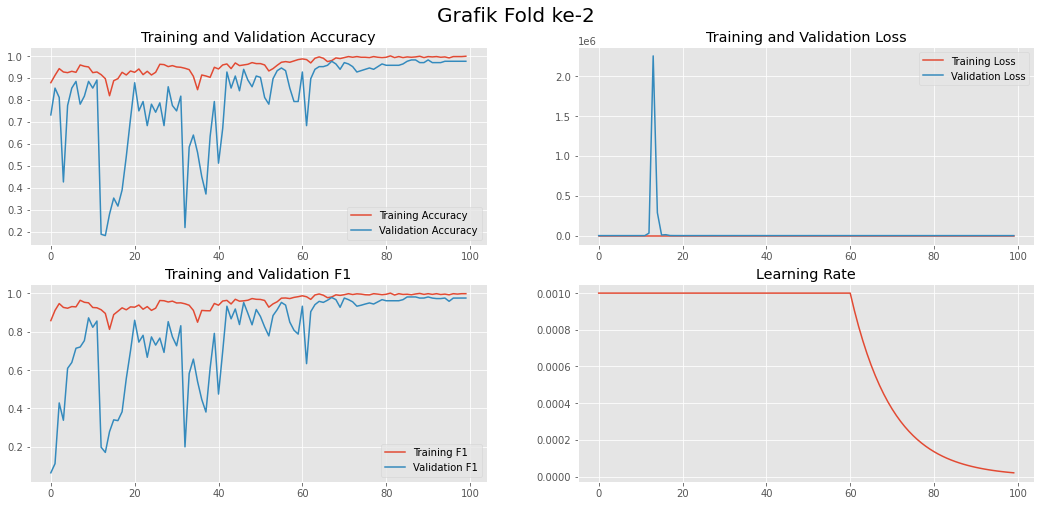


Fold 3/5

Found 657 validated image filenames belonging to 4 classes.
Found 164 validated image filenames belonging to 4 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
21/21 [==============================] - 16s 507ms/step - loss: 0.3292 - accuracy: 0.8858 - f1: 0.8487 - val_loss: 0.9076 - val_accuracy: 0.9390 - val_f1: 0.2542 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
21/21 [==============================] - 10s 455ms/step - loss: 0.1736 - accuracy: 0.9452 - f1: 0.9484 - val_loss: 0.7688 - val_accuracy: 0.9695 - val_f1: 0.4789 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
21/21 [==============================] - 10s 451ms/step - loss: 0.1584 - accuracy: 0.9437 - f1: 0.9414 - val_loss: 0.7735 - val_accuracy: 0.9756 - val_f1: 0.3608 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning rat

21/21 [==============================] - 10s 453ms/step - loss: 0.0896 - accuracy: 0.9787 - f1: 0.9757 - val_loss: 2.3594 - val_accuracy: 0.9268 - val_f1: 0.9142 - lr: 0.0010

Epoch 00031: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 31/100
21/21 [==============================] - 10s 457ms/step - loss: 0.1244 - accuracy: 0.9619 - f1: 0.9613 - val_loss: 1.0572 - val_accuracy: 0.7378 - val_f1: 0.7265 - lr: 0.0010

Epoch 00032: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 32/100
21/21 [==============================] - 10s 454ms/step - loss: 0.0904 - accuracy: 0.9635 - f1: 0.9664 - val_loss: 0.4731 - val_accuracy: 0.8598 - val_f1: 0.8715 - lr: 0.0010

Epoch 00033: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 33/100
21/21 [==============================] - 10s 455ms/step - loss: 0.0628 - accuracy: 0.9817 - f1: 0.9821 - val_loss: 2.4909 - val_accuracy: 0.6037 - val_f1: 0.6136 - lr: 0.0010

Epoch 00

21/21 [==============================] - 10s 449ms/step - loss: 0.0270 - accuracy: 0.9893 - f1: 0.9896 - val_loss: 0.1680 - val_accuracy: 0.9268 - val_f1: 0.9148 - lr: 0.0010

Epoch 00061: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 61/100
21/21 [==============================] - 10s 453ms/step - loss: 0.0646 - accuracy: 0.9878 - f1: 0.9868 - val_loss: 0.0916 - val_accuracy: 0.9634 - val_f1: 0.9659 - lr: 0.0010

Epoch 00062: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
Epoch 62/100
21/21 [==============================] - 10s 454ms/step - loss: 0.0436 - accuracy: 0.9833 - f1: 0.9843 - val_loss: 0.0615 - val_accuracy: 0.9695 - val_f1: 0.9716 - lr: 9.0484e-04

Epoch 00063: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
Epoch 63/100
21/21 [==============================] - 10s 451ms/step - loss: 0.0192 - accuracy: 0.9954 - f1: 0.9948 - val_loss: 0.0480 - va

21/21 [==============================] - 10s 451ms/step - loss: 0.0080 - accuracy: 0.9970 - f1: 0.9970 - val_loss: 0.0100 - val_accuracy: 1.0000 - val_f1: 1.0000 - lr: 7.4273e-05

Epoch 00088: LearningRateScheduler setting learning rate to tf.Tensor(6.720541e-05, shape=(), dtype=float32).
Epoch 88/100
21/21 [==============================] - 10s 452ms/step - loss: 0.0014 - accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000 - val_f1: 1.0000 - lr: 6.7205e-05

Epoch 00089: LearningRateScheduler setting learning rate to tf.Tensor(6.0809965e-05, shape=(), dtype=float32).
Epoch 89/100
21/21 [==============================] - 10s 454ms/step - loss: 0.0047 - accuracy: 0.9985 - f1: 0.9985 - val_loss: 0.0087 - val_accuracy: 1.0000 - val_f1: 1.0000 - lr: 6.0810e-05

Epoch 00090: LearningRateScheduler setting learning rate to tf.Tensor(5.502313e-05, shape=(), dtype=float32).
Epoch 90/100
21/21 [==============================] - 10s 448ms/step - loss: 0.0051 - accuracy: 0.9970 

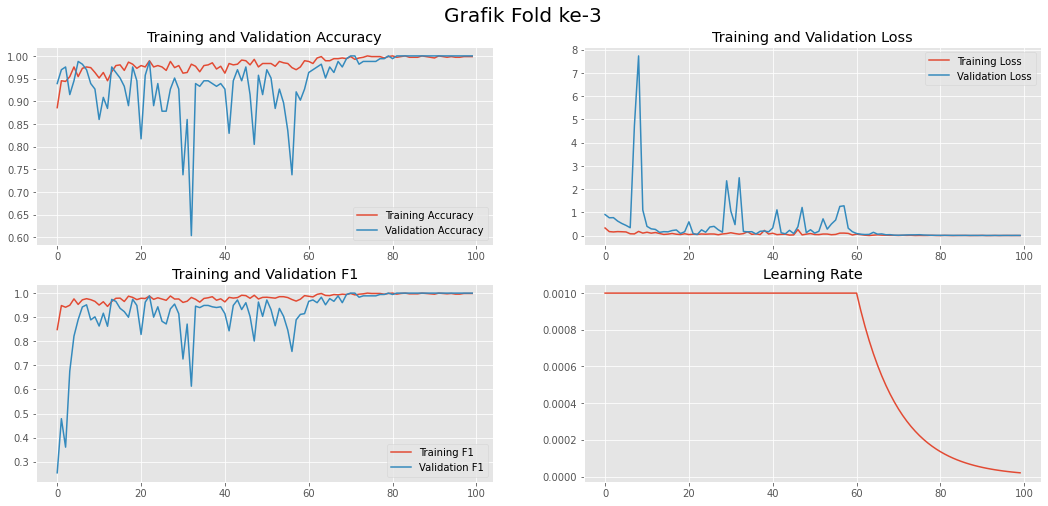


Fold 4/5

Found 657 validated image filenames belonging to 4 classes.
Found 164 validated image filenames belonging to 4 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
21/21 [==============================] - 16s 509ms/step - loss: 0.3377 - accuracy: 0.8965 - f1: 0.8382 - val_loss: 0.8996 - val_accuracy: 0.9573 - val_f1: 0.1980 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
21/21 [==============================] - 10s 463ms/step - loss: 0.0683 - accuracy: 0.9772 - f1: 0.9769 - val_loss: 0.7098 - val_accuracy: 0.9634 - val_f1: 0.6263 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
21/21 [==============================] - 10s 454ms/step - loss: 0.0427 - accuracy: 0.9833 - f1: 0.9836 - val_loss: 0.5677 - val_accuracy: 0.9695 - val_f1: 0.8138 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning rat

21/21 [==============================] - 10s 459ms/step - loss: 0.2011 - accuracy: 0.9726 - f1: 0.9713 - val_loss: 3.9383 - val_accuracy: 0.7805 - val_f1: 0.7920 - lr: 0.0010

Epoch 00031: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 31/100
21/21 [==============================] - 10s 461ms/step - loss: 0.1903 - accuracy: 0.9452 - f1: 0.9471 - val_loss: 4.6038 - val_accuracy: 0.6159 - val_f1: 0.5922 - lr: 0.0010

Epoch 00032: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 32/100
21/21 [==============================] - 10s 460ms/step - loss: 0.0855 - accuracy: 0.9711 - f1: 0.9691 - val_loss: 2.2745 - val_accuracy: 0.5732 - val_f1: 0.5702 - lr: 0.0010

Epoch 00033: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 33/100
21/21 [==============================] - 10s 456ms/step - loss: 0.1059 - accuracy: 0.9680 - f1: 0.9709 - val_loss: 0.2519 - val_accuracy: 0.9085 - val_f1: 0.8977 - lr: 0.0010

Epoch 00

21/21 [==============================] - 10s 467ms/step - loss: 0.0162 - accuracy: 0.9970 - f1: 0.9962 - val_loss: 0.2309 - val_accuracy: 0.9390 - val_f1: 0.9432 - lr: 0.0010

Epoch 00061: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 61/100
21/21 [==============================] - 10s 457ms/step - loss: 0.0502 - accuracy: 0.9848 - f1: 0.9844 - val_loss: 0.2255 - val_accuracy: 0.9634 - val_f1: 0.9489 - lr: 0.0010

Epoch 00062: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
Epoch 62/100
21/21 [==============================] - 10s 456ms/step - loss: 0.0218 - accuracy: 0.9909 - f1: 0.9918 - val_loss: 0.0884 - val_accuracy: 0.9695 - val_f1: 0.9716 - lr: 9.0484e-04

Epoch 00063: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
Epoch 63/100
21/21 [==============================] - 10s 463ms/step - loss: 0.0166 - accuracy: 0.9909 - f1: 0.9911 - val_loss: 0.0713 - va

21/21 [==============================] - 10s 461ms/step - loss: 0.0034 - accuracy: 0.9985 - f1: 0.9985 - val_loss: 0.0569 - val_accuracy: 0.9756 - val_f1: 0.9773 - lr: 7.4273e-05

Epoch 00088: LearningRateScheduler setting learning rate to tf.Tensor(6.720541e-05, shape=(), dtype=float32).
Epoch 88/100
21/21 [==============================] - 10s 458ms/step - loss: 0.0077 - accuracy: 0.9985 - f1: 0.9985 - val_loss: 0.0583 - val_accuracy: 0.9817 - val_f1: 0.9830 - lr: 6.7205e-05

Epoch 00089: LearningRateScheduler setting learning rate to tf.Tensor(6.0809965e-05, shape=(), dtype=float32).
Epoch 89/100
21/21 [==============================] - 10s 457ms/step - loss: 0.0065 - accuracy: 0.9970 - f1: 0.9970 - val_loss: 0.0574 - val_accuracy: 0.9817 - val_f1: 0.9830 - lr: 6.0810e-05

Epoch 00090: LearningRateScheduler setting learning rate to tf.Tensor(5.502313e-05, shape=(), dtype=float32).
Epoch 90/100
21/21 [==============================] - 10s 465ms/step - loss: 0.0018 - accuracy: 1.0000 

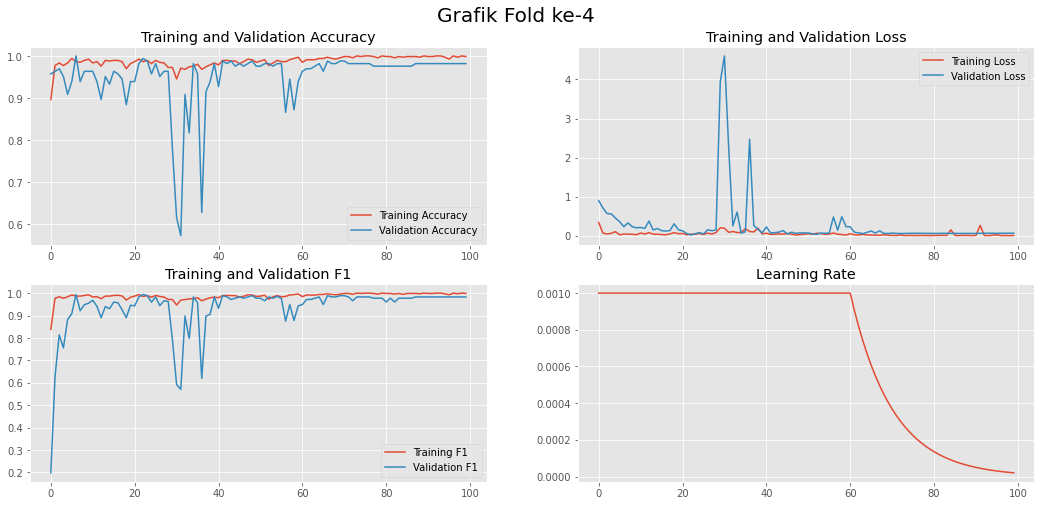


Fold 5/5

Found 657 validated image filenames belonging to 4 classes.
Found 164 validated image filenames belonging to 4 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
21/21 [==============================] - 16s 518ms/step - loss: 0.3368 - accuracy: 0.8630 - f1: 0.8508 - val_loss: 0.9438 - val_accuracy: 0.9146 - val_f1: 0.1788 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
21/21 [==============================] - 10s 456ms/step - loss: 0.0842 - accuracy: 0.9802 - f1: 0.9807 - val_loss: 0.7953 - val_accuracy: 0.9817 - val_f1: 0.4553 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
21/21 [==============================] - 10s 450ms/step - loss: 0.0677 - accuracy: 0.9787 - f1: 0.9770 - val_loss: 0.7632 - val_accuracy: 0.9695 - val_f1: 0.5856 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning rat

21/21 [==============================] - 10s 459ms/step - loss: 0.0248 - accuracy: 0.9939 - f1: 0.9940 - val_loss: 0.0285 - val_accuracy: 0.9817 - val_f1: 0.9830 - lr: 0.0010

Epoch 00031: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 31/100
21/21 [==============================] - 10s 463ms/step - loss: 0.0223 - accuracy: 0.9909 - f1: 0.9911 - val_loss: 0.0121 - val_accuracy: 0.9939 - val_f1: 0.9943 - lr: 0.0010

Epoch 00032: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 32/100
21/21 [==============================] - 10s 455ms/step - loss: 0.0463 - accuracy: 0.9863 - f1: 0.9866 - val_loss: 0.0450 - val_accuracy: 0.9817 - val_f1: 0.9830 - lr: 0.0010

Epoch 00033: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 33/100
21/21 [==============================] - 10s 458ms/step - loss: 0.0319 - accuracy: 0.9893 - f1: 0.9903 - val_loss: 0.0247 - val_accuracy: 0.9817 - val_f1: 0.9830 - lr: 0.0010

Epoch 00

21/21 [==============================] - 10s 453ms/step - loss: 0.1217 - accuracy: 0.9893 - f1: 0.9870 - val_loss: 0.1322 - val_accuracy: 0.9634 - val_f1: 0.9659 - lr: 0.0010

Epoch 00061: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 61/100
21/21 [==============================] - 10s 453ms/step - loss: 0.0692 - accuracy: 0.9817 - f1: 0.9808 - val_loss: 1.0630 - val_accuracy: 0.8841 - val_f1: 0.8972 - lr: 0.0010

Epoch 00062: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
Epoch 62/100
21/21 [==============================] - 10s 452ms/step - loss: 0.4107 - accuracy: 0.9726 - f1: 0.9719 - val_loss: 142.3869 - val_accuracy: 0.3537 - val_f1: 0.3466 - lr: 9.0484e-04

Epoch 00063: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
Epoch 63/100
21/21 [==============================] - 10s 463ms/step - loss: 0.6440 - accuracy: 0.9041 - f1: 0.9049 - val_loss: 210.6526 

21/21 [==============================] - 10s 453ms/step - loss: 0.0176 - accuracy: 0.9954 - f1: 0.9948 - val_loss: 0.0361 - val_accuracy: 0.9939 - val_f1: 0.9943 - lr: 7.4273e-05

Epoch 00088: LearningRateScheduler setting learning rate to tf.Tensor(6.720541e-05, shape=(), dtype=float32).
Epoch 88/100
21/21 [==============================] - 10s 455ms/step - loss: 0.0975 - accuracy: 0.9802 - f1: 0.9813 - val_loss: 0.0352 - val_accuracy: 0.9878 - val_f1: 0.9886 - lr: 6.7205e-05

Epoch 00089: LearningRateScheduler setting learning rate to tf.Tensor(6.0809965e-05, shape=(), dtype=float32).
Epoch 89/100
21/21 [==============================] - 10s 460ms/step - loss: 0.0143 - accuracy: 0.9924 - f1: 0.9926 - val_loss: 0.0340 - val_accuracy: 0.9939 - val_f1: 0.9943 - lr: 6.0810e-05

Epoch 00090: LearningRateScheduler setting learning rate to tf.Tensor(5.502313e-05, shape=(), dtype=float32).
Epoch 90/100
21/21 [==============================] - 10s 456ms/step - loss: 0.0207 - accuracy: 0.9924 

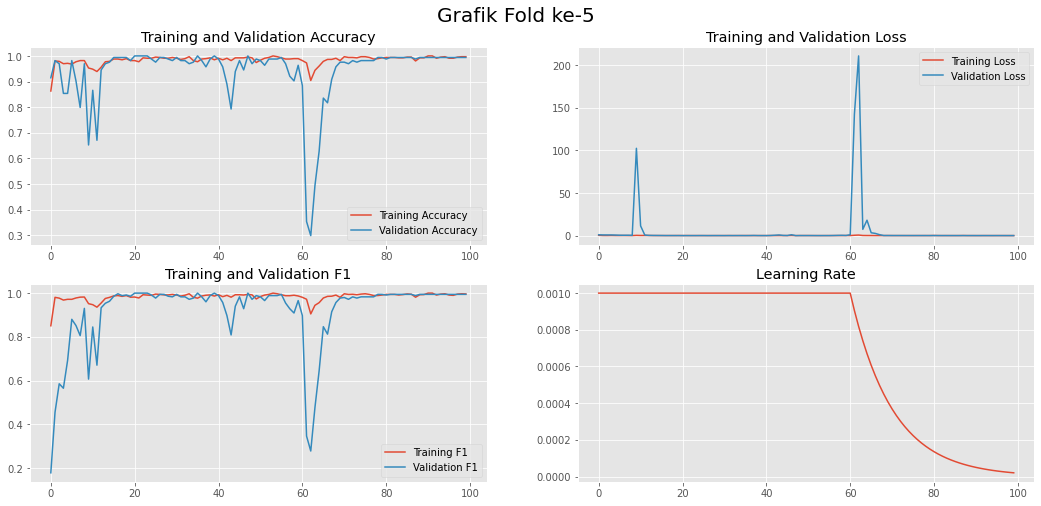

In [30]:
img_size = 180
fold_var = 0
epochs=100
for train_index, val_index in skf.split(X_train, y_train) :
    training_data = X_train.iloc[train_index]
    validation_data = X_train.iloc[val_index]
    
    fold_var += 1
    print("Fold ", fold_var, "/", num_fold, sep='')
    print()
    
    train_generator = train_datagen.flow_from_dataframe(dataframe=training_data,
                                                          x_col="Image path",  
                                                          y_col="Class",  
                                                          target_size=(img_size, img_size),
                                                          batch_size= 32,
                                                          seed = 2022)

    validation_generator = validation_datagen.flow_from_dataframe(dataframe=validation_data,
                                                                    x_col="Image path",
                                                                    y_col="Class",
                                                                    target_size=(img_size, img_size),
                                                                    batch_size=16,
                                                                    seed = 2022)
    
    tf.keras.backend.clear_session()
    model = getModel()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1])
    
#    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#                      filepath='weights-improvement-fold ke%d-{epoch:04d}-{val_f1:.5f}.hdf5'%fold_var,
#                      monitor='val_f1',
#                      mode='max',
#                      save_best_only=True,
#                      verbose=1)

    callbacks = [keras.callbacks.LearningRateScheduler(scheduler, verbose=1)]
    
    history = model.fit(train_generator,
                        epochs=epochs,
                        validation_data=validation_generator,
                        callbacks = callbacks)
    
    accuracy += [history.history['accuracy']]
    val_accuracy += [history.history['val_accuracy']]

    loss += [history.history['loss']]
    val_loss += [history.history['val_loss']]

    f_1 += [history.history['f1']]
    val_f1 += [history.history['val_f1']]
    
    plot_result(history, 
                epochs, 
                "Grafik Fold ke-{}".format(str(fold_var)))
    
#    tf.saved_model.save(model, 
#                        export_dir = 'D:/Latihan/Model save')
    print()

In [32]:
# Provide average scores
mean_loss = []
mean_accuracy = []
mean_val_loss = []
mean_val_accuracy = []
mean_f1 = []
mean_val_f1 = []
print('------------------------------------------------------------------------')
print('Score per Fold')
for i in range(0, fold_var):
    print('----------------------------------------------------------------------------')
    print('> Fold {} - Loss: {} - Accuracy: {}'.format(i+1,np.min(loss[i]), np.max(accuracy[i])))
    print('> Fold {} - Val Loss: {} - Val Accuracy: {}'.format(i+1, np.min(val_loss[i]), np.max(val_accuracy[i])))
    print('> Fold {} - F1: {} - Val F1: {}'.format(i+1, np.max(f_1[i]), np.max(val_f1[i])))
    
    mean_loss.append(np.min(loss[i]))
    mean_accuracy.append(np.max(accuracy[i]))
    mean_val_loss.append(np.min(val_loss[i]))
    mean_val_accuracy.append(np.max(val_accuracy[i]))
    mean_f1.append(np.max(f_1[i]))
    mean_val_f1.append(np.max(val_f1[i]))
    
print('------------------------------------------------------------------------------')
print('Average scores for all folds:')
print('> Loss: {} - Accuracy: {} (+- {})'.format(np.mean(mean_loss), np.mean(mean_accuracy), np.std(mean_accuracy)))
print('> Val Loss: {} - Val Accuracy: {} (+- {})'.format(np.mean(mean_val_loss), np.mean(mean_val_accuracy), np.std(mean_val_accuracy)))
print('> F1: {} - Val F1: {}'.format(np.mean(mean_f1), np.mean(mean_val_f1)))
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per Fold
----------------------------------------------------------------------------
> Fold 1 - Loss: 0.007648027502000332 - Accuracy: 0.9984756112098694
> Fold 1 - Val Loss: 0.34816327691078186 - Val Accuracy: 0.9212121367454529
> Fold 1 - F1: 0.9985119104385376 - Val F1: 0.9204545617103577
----------------------------------------------------------------------------
> Fold 2 - Loss: 0.005229424685239792 - Accuracy: 1.0
> Fold 2 - Val Loss: 0.0807831659913063 - Val Accuracy: 0.9817073345184326
> Fold 2 - F1: 1.0 - Val F1: 0.9800220131874084
----------------------------------------------------------------------------
> Fold 3 - Loss: 0.0013378117000684142 - Accuracy: 1.0
> Fold 3 - Val Loss: 0.00783821102231741 - Val Accuracy: 1.0
> Fold 3 - F1: 1.0 - Val F1: 1.0
----------------------------------------------------------------------------
> Fold 4 - Loss: 0.0015049583744257689 - Accuracy: 1.0
> Fold 4 - Val 

## Last part from SKFold

In [37]:
train_generator = train_datagen.flow_from_dataframe(dataframe=X_train,
                                                          x_col="Image path",  
                                                          y_col="Class",  
                                                          target_size=(img_size, img_size),
                                                          batch_size= 32,
                                                          seed = 2022)

test_generator = test_datagen.flow_from_dataframe(dataframe=X_test,
                                                  x_col="Image path",
                                                  y_col="Class",
                                                  target_size=(img_size, img_size),
                                                  batch_size=1,
                                                  seed = 2022,
                                                  shuffle = False)

Found 821 validated image filenames belonging to 4 classes.
Found 92 validated image filenames belonging to 4 classes.


In [38]:
last = getModel()
last.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('InceptionV3' + "-weights-improvement-{epoch:04d}-{val_accuracy:.5f}.h5",
                                                               monitor="val_accuracy",
                                                               verbose=1,
                                                               save_best_only=True,  
                                                               mode="max") 

callbacks = [model_checkpoint_callback, keras.callbacks.LearningRateScheduler(scheduler, verbose=1)]
    
history_last = last.fit(train_generator,
                         epochs=200,
                         callbacks = callbacks,
                         validation_data = test_generator)


Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/200
26/26 [==============================] - ETA: 0s - loss: 0.1824 - accuracy: 0.9574
Epoch 00001: val_accuracy improved from -inf to 0.70652, saving model to InceptionV3-weights-improvement-0001-0.70652.h5
26/26 [==============================] - 21s 599ms/step - loss: 0.1824 - accuracy: 0.9574 - val_loss: 0.9495 - val_accuracy: 0.7065 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/200
26/26 [==============================] - ETA: 0s - loss: 0.1181 - accuracy: 0.9829
Epoch 00002: val_accuracy did not improve from 0.70652
26/26 [==============================] - 14s 527ms/step - loss: 0.1181 - accuracy: 0.9829 - val_loss: 0.8670 - val_accuracy: 0.6957 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/200
26/26 [==============================] - ETA: 0s - loss: 0.0622 - accuracy: 0.98

26/26 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9927
Epoch 00021: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 522ms/step - loss: 0.0233 - accuracy: 0.9927 - val_loss: 0.4666 - val_accuracy: 0.9239 - lr: 0.0010

Epoch 00022: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 22/200
26/26 [==============================] - ETA: 0s - loss: 0.0218 - accuracy: 0.9903
Epoch 00022: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 525ms/step - loss: 0.0218 - accuracy: 0.9903 - val_loss: 0.3928 - val_accuracy: 0.9457 - lr: 0.0010

Epoch 00023: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 23/200
26/26 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9903
Epoch 00023: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 521ms/step - loss: 0.0351 - accuracy: 0.9903 - val_loss: 


Epoch 00043: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 43/200
26/26 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9890
Epoch 00043: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 518ms/step - loss: 0.0317 - accuracy: 0.9890 - val_loss: 0.3568 - val_accuracy: 0.9130 - lr: 0.0010

Epoch 00044: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 44/200
26/26 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9878
Epoch 00044: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 517ms/step - loss: 0.0358 - accuracy: 0.9878 - val_loss: 0.3006 - val_accuracy: 0.9239 - lr: 0.0010

Epoch 00045: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 45/200
26/26 [==============================] - ETA: 0s - loss: 0.0480 - accuracy: 0.9866
Epoch 00045: val_accuracy did not improve from 0.94565
26/26

26/26 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.9976
Epoch 00064: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 523ms/step - loss: 0.0101 - accuracy: 0.9976 - val_loss: 0.4777 - val_accuracy: 0.9239 - lr: 7.4082e-04

Epoch 00065: LearningRateScheduler setting learning rate to tf.Tensor(0.0006703199, shape=(), dtype=float32).
Epoch 65/200
26/26 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9927
Epoch 00065: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 519ms/step - loss: 0.0152 - accuracy: 0.9927 - val_loss: 0.4004 - val_accuracy: 0.9239 - lr: 6.7032e-04

Epoch 00066: LearningRateScheduler setting learning rate to tf.Tensor(0.00060653046, shape=(), dtype=float32).
Epoch 66/200
26/26 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9988
Epoch 00066: val_accuracy did not improve from 0.94565
26/26 [==============================] 

26/26 [==============================] - ETA: 0s - loss: 0.0798 - accuracy: 0.9976
Epoch 00084: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 522ms/step - loss: 0.0798 - accuracy: 0.9976 - val_loss: 0.4668 - val_accuracy: 0.9130 - lr: 1.0026e-04

Epoch 00085: LearningRateScheduler setting learning rate to tf.Tensor(9.0717826e-05, shape=(), dtype=float32).
Epoch 85/200
26/26 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9988
Epoch 00085: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 525ms/step - loss: 0.0031 - accuracy: 0.9988 - val_loss: 0.4639 - val_accuracy: 0.9130 - lr: 9.0718e-05

Epoch 00086: LearningRateScheduler setting learning rate to tf.Tensor(8.208488e-05, shape=(), dtype=float32).
Epoch 86/200
26/26 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9976
Epoch 00086: val_accuracy did not improve from 0.94565
26/26 [==============================] 

26/26 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.9988
Epoch 00104: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 525ms/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.4754 - val_accuracy: 0.9130 - lr: 1.3569e-05

Epoch 00105: LearningRateScheduler setting learning rate to tf.Tensor(1.2277308e-05, shape=(), dtype=float32).
Epoch 105/200
26/26 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9988
Epoch 00105: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 526ms/step - loss: 0.0024 - accuracy: 0.9988 - val_loss: 0.4763 - val_accuracy: 0.9130 - lr: 1.2277e-05

Epoch 00106: LearningRateScheduler setting learning rate to tf.Tensor(1.1108968e-05, shape=(), dtype=float32).
Epoch 106/200
26/26 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9988
Epoch 00106: val_accuracy did not improve from 0.94565
26/26 [=============================

26/26 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 00124: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 523ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.4670 - val_accuracy: 0.9130 - lr: 1.8363e-06

Epoch 00125: LearningRateScheduler setting learning rate to tf.Tensor(1.6615512e-06, shape=(), dtype=float32).
Epoch 125/200
26/26 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9988
Epoch 00125: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 525ms/step - loss: 0.0027 - accuracy: 0.9988 - val_loss: 0.4681 - val_accuracy: 0.9130 - lr: 1.6616e-06

Epoch 00126: LearningRateScheduler setting learning rate to tf.Tensor(1.5034336e-06, shape=(), dtype=float32).
Epoch 126/200
26/26 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9951
Epoch 00126: val_accuracy did not improve from 0.94565
26/26 [=============================

26/26 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9988
Epoch 00144: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 517ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.4643 - val_accuracy: 0.9130 - lr: 2.4852e-07

Epoch 00145: LearningRateScheduler setting learning rate to tf.Tensor(2.2486627e-07, shape=(), dtype=float32).
Epoch 145/200
26/26 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9988
Epoch 00145: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 518ms/step - loss: 0.0055 - accuracy: 0.9988 - val_loss: 0.4686 - val_accuracy: 0.9130 - lr: 2.2487e-07

Epoch 00146: LearningRateScheduler setting learning rate to tf.Tensor(2.0346741e-07, shape=(), dtype=float32).
Epoch 146/200
26/26 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 00146: val_accuracy did not improve from 0.94565
26/26 [=============================

26/26 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 00164: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 522ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4640 - val_accuracy: 0.9130 - lr: 3.3633e-08

Epoch 00165: LearningRateScheduler setting learning rate to tf.Tensor(3.0432307e-08, shape=(), dtype=float32).
Epoch 165/200
26/26 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 00165: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 518ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4666 - val_accuracy: 0.9130 - lr: 3.0432e-08

Epoch 00166: LearningRateScheduler setting learning rate to tf.Tensor(2.753629e-08, shape=(), dtype=float32).
Epoch 166/200
26/26 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.9988
Epoch 00166: val_accuracy did not improve from 0.94565
26/26 [==============================

26/26 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 00184: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 525ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4656 - val_accuracy: 0.9130 - lr: 4.5517e-09

Epoch 00185: LearningRateScheduler setting learning rate to tf.Tensor(4.11856e-09, shape=(), dtype=float32).
Epoch 185/200
26/26 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 00185: val_accuracy did not improve from 0.94565
26/26 [==============================] - 14s 529ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4623 - val_accuracy: 0.9130 - lr: 4.1186e-09

Epoch 00186: LearningRateScheduler setting learning rate to tf.Tensor(3.726627e-09, shape=(), dtype=float32).
Epoch 186/200
26/26 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 00186: val_accuracy did not improve from 0.94565
26/26 [==============================] 

In [39]:
from keras.models import load_model
model_load = load_model('D:/Latihan/Model save/InceptionV3-weights-improvement-0089-0.97826.h5')

In [40]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
predictions = model_load.predict(test_generator)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
print()
k = PrettyTable(['Accuracy Predictions', 'Accuracy Precision', 'Accuracy f1'])
k.add_row([accuracy_score(true_classes, yPredictions), 
            precision_score(true_classes, yPredictions, average='weighted'), 
            f1_score(true_classes, yPredictions, average='weighted')])
print(k)


+----------------------+--------------------+-------------------+
| Accuracy Predictions | Accuracy Precision |    Accuracy f1    |
+----------------------+--------------------+-------------------+
|  0.9782608695652174  | 0.9786789297658863 | 0.978256519999304 |
+----------------------+--------------------+-------------------+


In [41]:
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, yPredictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.96      1.00      0.98        25
           2       1.00      1.00      1.00        17
           3       1.00      0.96      0.98        25

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



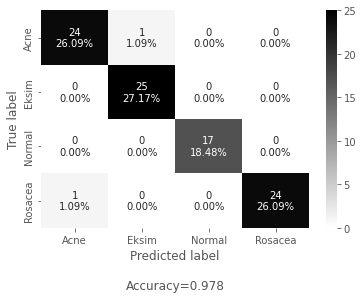

In [42]:
import cf_matrix
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(np.array(true_classes, dtype='int64'), np.array(yPredictions))
categories = ['Acne', 'Eksim', 'Normal', 'Rosacea']
cf_matrix.make_confusion_matrix(confusion_matrix, 
                                categories=categories, 
                                cmap='binary')

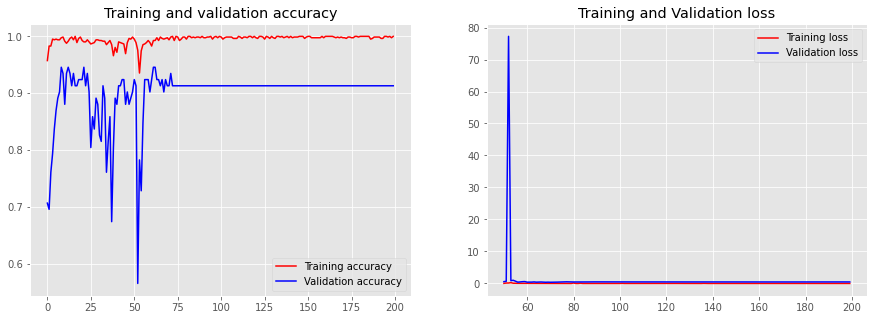

In [43]:
acc = history_last.history['accuracy']
val_acc = history_last.history['val_accuracy']
loss = history_last.history['loss']
val_loss = history_last.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.plot(epochs[50:], loss[50:], 'r', label='Training loss')
plt.plot(epochs[50:], val_loss[50:], 'b', label='Validation loss')
plt.title('Training and Validation loss')
#plt.xlim(30,101)
#plt.margins(0.000000000000001)
plt.legend(loc=0)

plt.show()

## Upload image to predict using our Model

In [97]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
filename = filedialog.askopenfilename()
button = tk.Button(root, text='Select Image', command=filename)
button.pack()
root.destroy()
root.mainloop()

In [98]:
from keras.preprocessing import image
def load_image(img_path, show=True):

    img = image.load_img(img_path, target_size=(180, 180))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

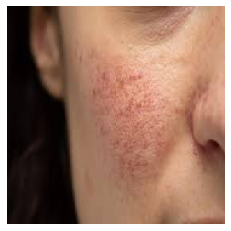

array([[[[0.03529412, 0.01176471, 0.01176471],
         [0.03529412, 0.01176471, 0.01176471],
         [0.03529412, 0.01176471, 0.01176471],
         ...,
         [0.8039216 , 0.5803922 , 0.4627451 ],
         [0.8235294 , 0.62352943, 0.5019608 ],
         [0.8235294 , 0.62352943, 0.5019608 ]],

        [[0.03529412, 0.01176471, 0.01176471],
         [0.03529412, 0.01176471, 0.01176471],
         [0.03529412, 0.01176471, 0.01176471],
         ...,
         [0.80784315, 0.58431375, 0.46666667],
         [0.8235294 , 0.62352943, 0.5019608 ],
         [0.8235294 , 0.62352943, 0.5019608 ]],

        [[0.03529412, 0.01176471, 0.01176471],
         [0.03529412, 0.01176471, 0.01176471],
         [0.03529412, 0.01176471, 0.01176471],
         ...,
         [0.80784315, 0.58431375, 0.46666667],
         [0.81960785, 0.61960787, 0.49803922],
         [0.8235294 , 0.62352943, 0.5019608 ]],

        ...,

        [[0.07058824, 0.03137255, 0.02745098],
         [0.07450981, 0.03529412, 0.03137255]

In [99]:
load_image(filename)

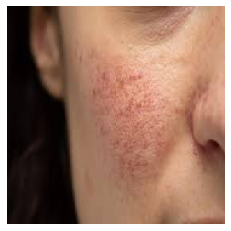

In [102]:
new_image = load_image(filename)
predictions = model_load.predict(new_image)

In [101]:
predictions_array = predictions.flatten() #flatten berfungsi menghapus [[]] pada predictions menjadi []
Urutan = -np.sort(-predictions_array) #mengurutkan dari yang terbesar ke terkecil
sort_index = np.argsort(-predictions_array) #mengambil index awal dari yang sudah diurutkan

#Membuat tabel
Panjang = len(data1['Class'])
from prettytable import PrettyTable
t = PrettyTable(['i', 'Class', 'Prediction', 'Dalam persen'])
t.title = 'Prediksi Gambar'
for i in range (0,Panjang) :
    t.add_row([i, data1['Class'][sort_index[i]], Urutan[i], '{:.2%}'.format(Urutan[i])])
print(t)

+--------------------------------------------+
|              Prediksi Gambar               |
+---+---------+---------------+--------------+
| i |  Class  |   Prediction  | Dalam persen |
+---+---------+---------------+--------------+
| 0 | Rosacea |   0.99745446  |    99.75%    |
| 1 |   Acne  |  0.0019761212 |    0.20%     |
| 2 |  Eksim  | 0.00055528956 |    0.06%     |
| 3 |  Normal | 1.4201331e-05 |    0.00%     |
+---+---------+---------------+--------------+


## Load saved Model to be convert into JSON

In [53]:
import tensorflowjs as tfjs

!tensorflowjs_converter --input_format keras_saved_model \
                        D:/Latihan/InceptionV3-weights-improvement-0089-0.97826.h5 \
                        D:/Latihan

2022-06-05 14:31:19.000799: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-05 14:31:19.542573: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2133 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
Instructions for updating:
Colocations handled automatically by placer.


## Convert Load Model to TF Serving

In [63]:
tf.saved_model.save(model_load, 'D:/Latihan/Model save')

INFO:tensorflow:Assets written to: D:/Latihan/Model save\assets
